In [15]:
import pandas as pd 

In [47]:
tracks_df = pd.read_json("tracks.json")
tracks_df.head()
tracks_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   title                 11166 non-null  object 
 3   featured_artists      3517 non-null   object 
 4   primary_artist        11166 non-null  object 
 5   language              11061 non-null  object 
 6   album                 9652 non-null   object 
 7   swear_IT              11166 non-null  int64  
 8   swear_EN              11166 non-null  int64  
 9   swear_IT_words        11166 non-null  object 
 10  swear_EN_words        11166 non-null  object 
 11  year                  10722 non-null  float64
 12  month                 9969 non-null   float64
 13  day                   9843 non-null   float64
 14  n_sentences           11090 non-null  float64
 15  n_tokens           

In [46]:
artists_df = pd.read_xml("artists.xml")
artists_df.head()
artists_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_author     104 non-null    object 
 1   name          104 non-null    object 
 2   gender        104 non-null    object 
 3   birth_date    73 non-null     object 
 4   birth_place   72 non-null     object 
 5   nationality   71 non-null     object 
 6   description   86 non-null     object 
 7   active_start  50 non-null     object 
 8   active_end    0 non-null      float64
 9   province      70 non-null     object 
 10  region        68 non-null     object 
 11  country       70 non-null     object 
 12  latitude      72 non-null     float64
 13  longitude     72 non-null     float64
dtypes: float64(3), object(11)
memory usage: 11.5+ KB


In [18]:
print("Tracks:", tracks_df.shape)
print("Artists:", artists_df.shape)


Tracks: (11166, 37)
Artists: (104, 14)


coordinate spaziali

In [19]:
!pip install geohash2


In [20]:
artists = artists_df.copy()


In [21]:
import geohash2
import pandas as pd

def compute_geohash(row, precision):
    lat = row["latitude"]
    lon = row["longitude"]
    if pd.isna(lat) or pd.isna(lon):
        return None
    return geohash2.encode(lat, lon, precision)

artists["geohash_6"] = artists.apply(lambda r: compute_geohash(r, 6), axis=1)
artists["geohash_5"] = artists.apply(lambda r: compute_geohash(r, 5), axis=1)
artists["geohash_3"] = artists.apply(lambda r: compute_geohash(r, 3), axis=1)

artists.head()

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,geohash_6,geohash_5,geohash_3
0,ART82291002,99 posse,M,None,None,None,gruppo musicale italiano,1991-01-01,NaN,None,None,None,NaN,NaN,None,None,None
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738,u0pf9b,u0pf9,u0p
2,ART18853907,alfa,M,None,None,None,None,None,NaN,None,None,None,NaN,NaN,None,None,None
3,ART64265460,anna pepe,F,None,None,None,None,None,NaN,None,None,None,NaN,NaN,None,None,None
4,ART75741740,articolo 31,M,None,None,None,gruppo musicale hip hop italiano,1990-01-01,NaN,None,None,None,NaN,NaN,None,None,None


In [22]:
# top geohash5 (zona cittadina)
top_zones_5 = (
    artists[artists["geohash_5"].notna()]
    .groupby("geohash_5")
    .size()
    .reset_index(name="n_artists")
    .sort_values("n_artists", ascending=False)
)

top_zones_5.head(10)


,geohash_5,n_artists
29,u0nd9,15
8,sr2yk,7
23,u0j2q,5
35,u205e,3
1,spqbb,3
12,sr60k,3
11,sr4vu,2
14,sr6c0,2
3,spyke,2
18,src2s,2


In [23]:
# top geohash 3 (macro area geografica)
top_zones_3 = (
    artists[artists["geohash_3"].notna()]
    .groupby("geohash_3")
    .size()
    .reset_index(name="n_artists")
    .sort_values("n_artists", ascending=False)
)

top_zones_3
top_zones_3.head(10)

,geohash_3,n_artists
14,u0n,22
6,sr2,8
13,u0j,7
8,sr6,6
16,u20,5
7,sr4,4
1,spq,3
2,spy,3
15,u0p,3
10,srb,2


In [24]:
#tabella della distribuzione geografica geohash6 
distribution_6 = (
    artists[artists["geohash_6"].notna()]
    .groupby("geohash_6")
    .size()
    .reset_index(name="n_artists")
)

distribution_6.head()


,geohash_6,n_artists
0,snyrp7,1
1,spqbb1,3
2,spygst,1
3,spykek,1
4,spyken,1


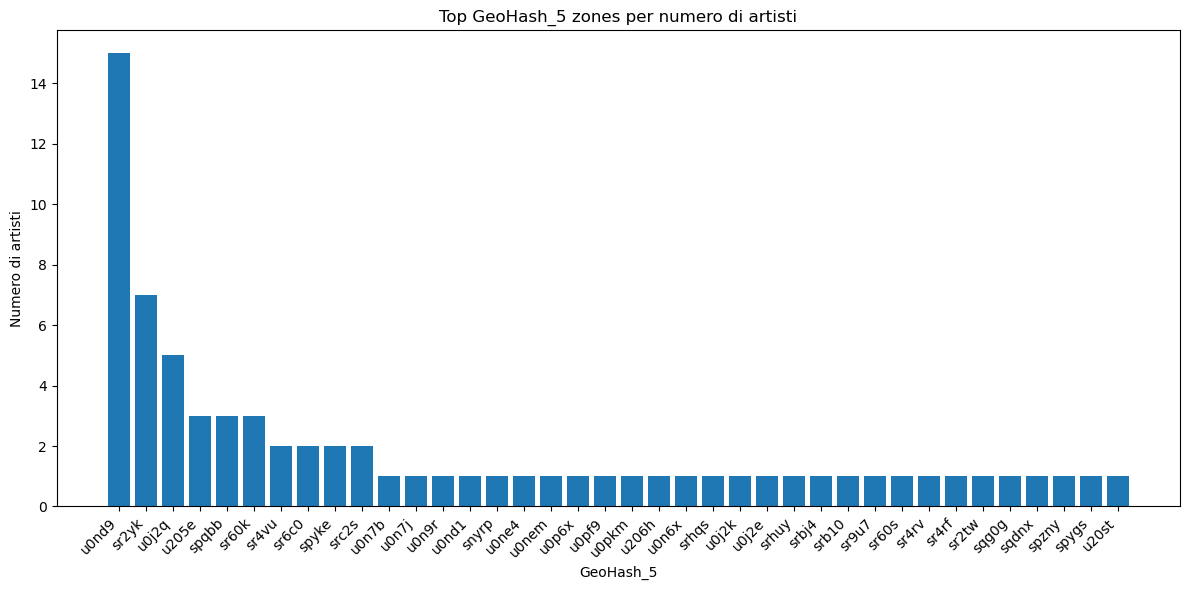

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'u0n'),
  Text(1, 0, 'sr2'),
  Text(2, 0, 'u0j'),
  Text(3, 0, 'sr6'),
  Text(4, 0, 'u20'),
  Text(5, 0, 'sr4'),
  Text(6, 0, 'spq'),
  Text(7, 0, 'spy'),
  Text(8, 0, 'u0p'),
  Text(9, 0, 'srb'),
  Text(10, 0, 'src'),
  Text(11, 0, 'srh'),
  Text(12, 0, 'sqg'),
  Text(13, 0, 'sqd'),
  Text(14, 0, 'sr9'),
  Text(15, 0, 'spz'),
  Text(16, 0, 'sny')])

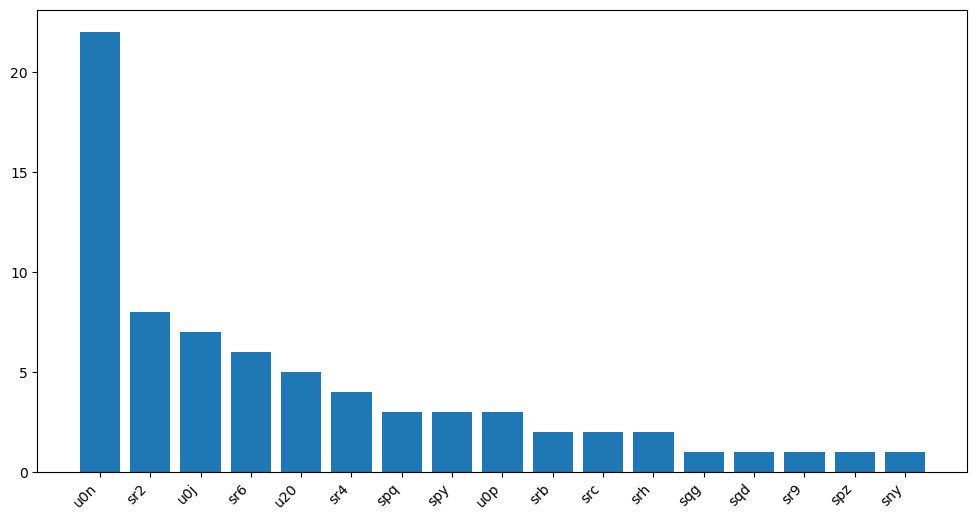

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top_zones_5["geohash_5"], top_zones_5["n_artists"])
plt.xticks(rotation=45, ha='right')
plt.title("Top GeoHash_5 zones per numero di artisti")
plt.xlabel("GeoHash_5")
plt.ylabel("Numero di artisti")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
plt.bar(top_zones_3["geohash_3"], top_zones_3["n_artists"])
plt.xticks(rotation=45, ha='right')

In [26]:
#decodifica da geohash a lat/lon e stima area/città
!pip install geopy
import geohash2
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# 1. Prendo solo le top zone (già calcolate)
top5 = top_zones_5.copy()

# 2. Decodifico geohash → lat/lon
top5["lat"], top5["lon"] = zip(*top5["geohash_5"].apply(lambda g: geohash2.decode(g)))

# 3. Apro geolocator per convertire lat/lon → città
geolocator = Nominatim(user_agent="geoartists")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def get_area(lat, lon):
    try:
        location = reverse((lat, lon), language="en")
        return location.address.split(",")[0]  # nome area/città
    except:
        return "Unknown"

# 4. Aggiungo una colonna con area stimata
top5["area_stimata"] = top5.apply(lambda r: get_area(r["lat"], r["lon"]), axis=1)

top5


,geohash_5,n_artists,lat,lon,area_stimata
29,u0nd9,15,45.5,9.2,11
8,sr2yk,7,41.9,12.5,Green Line Tours
23,u0j2q,5,45.1,7.7,17a
35,u205e,3,45.6,11.4,Contrade Val di Barco-Sudiri-Motto
1,spqbb,3,40.9,9.5,Via dei Mugnai
12,sr60k,3,40.8,14.3,Pietrarsa
11,sr4vu,2,40.4,15.3,Strada Provinciale Isca Tufolo
14,sr6c0,2,41.,15.1,Frigento
3,spyke,2,44.4,8.9,Via all'Ex Idroscalo
18,src2s,2,43.7,13.2,Sentiero degli Aironi


In [27]:
clean_top5 = top_zones_5[["geohash_5", "n_artists"]].copy()
clean_top5


,geohash_5,n_artists
29,u0nd9,15
8,sr2yk,7
23,u0j2q,5
35,u205e,3
1,spqbb,3
12,sr60k,3
11,sr4vu,2
14,sr6c0,2
3,spyke,2
18,src2s,2


In [28]:
missing_country = artists[artists["country"].isna()]
missing_country_with_geohash = missing_country[missing_country["geohash_5"].notna()]

missing_country_with_geohash[["id_author", "name", "geohash_5"]].head(10)


,id_author,name,geohash_5
6,ART40229749,baby k,u0j2q
89,ART98307962,shablo,spzny


In [29]:
import geohash2
import pandas as pd

# Step 1: artsti senza country ma con geohash
missing_country = artists[artists["country"].isna()]
missing_country_with_geo = missing_country[missing_country["geohash_5"].notna()].copy()

# Step 2: decode geohash → lat/lon
missing_country_with_geo["lat"], missing_country_with_geo["lon"] = zip(
    *missing_country_with_geo["geohash_5"].apply(lambda g: geohash2.decode(g))
)

# 🔥 Step 3: CONVERSIONE a float (ESSENZIALE per risolvere l'errore)
missing_country_with_geo["lat"] = missing_country_with_geo["lat"].astype(float)
missing_country_with_geo["lon"] = missing_country_with_geo["lon"].astype(float)

# Step 4: funzione stima_zona
def stima_zona(lat, lon):
    # Piemonte / Torino
    if 44.8 <= lat <= 45.4 and 6.5 <= lon <= 8.2:
        return "Piemonte – Area Torino"
    # Lombardia
    if 45.0 <= lat <= 46.0 and 8.0 <= lon <= 10.0:
        return "Lombardia – Area Milano/Bergamo"
    # Emilia Romagna
    if 44.5 <= lat <= 45.0 and 10.0 <= lon <= 11.0:
        return "Emilia-Romagna – Modena/Reggio"
    # Veneto
    if 45.1 <= lat <= 46.2 and 10.5 <= lon <= 12.5:
        return "Veneto – Area Verona/Vicenza"
    # Lazio
    if 41.5 <= lat <= 42.5 and 12.0 <= lon <= 13.0:
        return "Lazio – Area Roma"
    # Sicilia
    if 37.0 <= lat <= 38.8 and 12.0 <= lon <= 15.8:
        return "Sicilia"
    return "Zona italiana non classificata"

# Step 5: applica stima
missing_country_with_geo["zona_stimata"] = missing_country_with_geo.apply(
    lambda r: stima_zona(r["lat"], r["lon"]), axis=1
)

# Step 6: tabella finale
tabella_finale = missing_country_with_geo[["name", "geohash_5", "lat", "lon", "zona_stimata"]]
tabella_finale.columns = ["Artista", "GeoHash_5", "Lat", "Lon", "Zona stimata"]

tabella_finale


,Artista,GeoHash_5,Lat,Lon,Zona stimata
6,baby k,u0j2q,45.1,7.7,Piemonte – Area Torino
89,shablo,spzny,44.8,10.1,Emilia-Romagna – Modena/Reggio


In [30]:
artists[artists["name"].str.lower() == "baby k"]


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,geohash_6,geohash_5,geohash_3
6,ART40229749,baby k,F,1983-02-05,Singapore,Italia,cantautrice e rapper italiana (1983-),2007-01-01,NaN,None,None,None,45.080627,7.670717,u0j2qw,u0j2q,u0j


In [31]:
artists[artists["name"].str.lower() == "shablo"]


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,geohash_6,geohash_5,geohash_3
89,ART98307962,shablo,M,1980-11-17,Buenos Aires,Argentina,disc jockey e produttore discografico italo-ar...,None,NaN,None,None,None,44.803741,10.143004,spznyu,spzny,spz


In [32]:
artists[(artists["birth_place"].notna()) &
        (artists["country"].isna()) &
        (artists["region"].isna()) &
        (artists["province"].isna())]


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,geohash_6,geohash_5,geohash_3
6,ART40229749,baby k,F,1983-02-05,Singapore,Italia,cantautrice e rapper italiana (1983-),2007-01-01,NaN,None,None,None,45.080627,7.670717,u0j2qw,u0j2q,u0j
89,ART98307962,shablo,M,1980-11-17,Buenos Aires,Argentina,disc jockey e produttore discografico italo-ar...,None,NaN,None,None,None,44.803741,10.143004,spznyu,spzny,spz


In [33]:
artists_geo = artists[artists["geohash_5"].notna()][["name", "province", "region", "geohash_5"]]
artists_geo.head(15)


,name,province,region,geohash_5
1,achille lauro,Verona,Veneto,u0pf9
5,babaman,Milano,Lombardia,u0n7j
6,baby k,None,None,u0j2q
7,bassi maestro,Milano,Lombardia,u0nd9
13,caparezza,Lecce,Puglia,srhuy
14,capo plaza,Salerno,Campania,sr4vu
15,chadia rodriguez,Genova,Liguria,spyke
16,clementino,Avellino,Campania,sr6c0
18,coez,Salerno,Campania,sr4rv
21,dani faiv,La Spezia,Liguria,spygs


In [34]:
artists_birth_missing = artists[artists["birth_place"].isna()]
artists_birth_missing_with_geo = artists_birth_missing[artists_birth_missing["geohash_5"].notna()]

artists_birth_missing_with_geo.shape[0]


0

In [35]:
zone = top_zones_5.iloc[0]["geohash_5"]  # prende la zona top
artists_in_top_zone = artists[artists["geohash_5"] == zone][["name", "geohash_5"]]
artists_in_top_zone


,name,geohash_5
7,bassi maestro,u0nd9
25,don joe,u0nd9
29,entics,u0nd9
30,ernia,u0nd9
33,fedez,u0nd9
39,ghali,u0nd9
41,grido,u0nd9
47,j-ax,u0nd9
48,jack the smoker,u0nd9
49,jake la furia,u0nd9


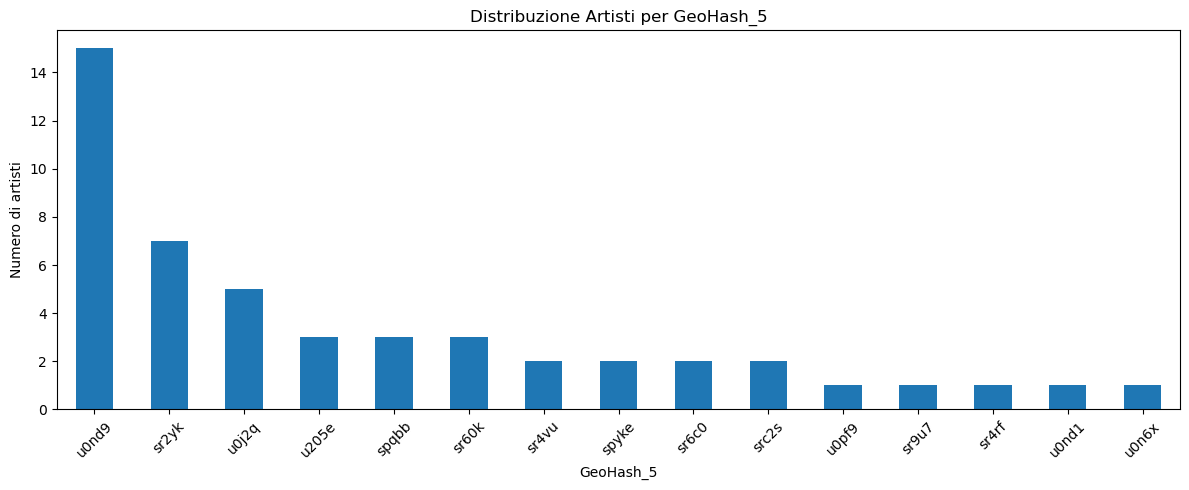

In [36]:
import matplotlib.pyplot as plt

conteggio_geohash = artists_geo["geohash_5"].value_counts().head(15)

plt.figure(figsize=(12,5))
conteggio_geohash.plot(kind="bar")
plt.title("Distribuzione Artisti per GeoHash_5")
plt.xlabel("GeoHash_5")
plt.ylabel("Numero di artisti")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ASSIGNMENT 3 

,title,primary_artist,cluster
0,​polka 2 :-/,Rosa Chemical,2.0
1,POLKA,Rosa Chemical,2.0
2,​britney ;-),Rosa Chemical,2.0
3,CEO,Rosa Chemical,0.0
4,LONDRA,Rosa Chemical,0.0
5,BOHEME,Rosa Chemical,0.0
6,LOBBY WAY,Rosa Chemical,2.0
7,SLATT,Rosa Chemical,2.0
8,MADE IN ITALY,Rosa Chemical,2.0
9,ROSE & ROVI,Rosa Chemical,2.0


=== Profilazione dei cluster ===


,word_count,unique_words,ttr,avg_words_per_line,swear_total
cluster,,,,,
0.0,306.017963,147.254622,0.514312,7.254474,1.399198
1.0,534.692308,255.000000,0.485079,497.730769,2.230769
2.0,560.672216,252.486127,0.455602,7.547665,4.813541


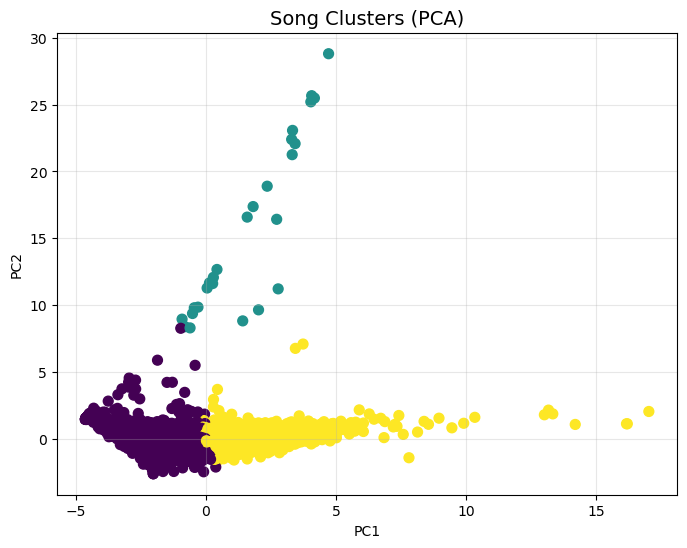

In [37]:
# ======================================================================
# ASSIGNMENT 3 — SONG PROFILING
# Notebook completo con estrazione feature dai lyrics e clustering
# ======================================================================

import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# 1. Dataset
# ----------------------------------------------------------------------

df = tracks_df.copy()

# ----------------------------------------------------------------------
# 2. Funzioni per pulizia testo e feature extraction
# ----------------------------------------------------------------------

def clean_text(text):
    """Rimuove caratteri strani, lowercase, pulizia minima."""
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"[^a-zA-Zàèéìòù0-9\s]", " ", text)
    return text

def word_count(text):
    return len(text.split()) if text else 0

def unique_words(text):
    return len(set(text.split())) if text else 0

def ttr(text):
    words = text.split()
    return len(set(words))/len(words) if len(words) > 0 else 0

def line_count(original):
    if isinstance(original, str):
        return original.count("\n") + 1
    return 1

# ----------------------------------------------------------------------
# 3. Estrarre feature dai lyrics
# ----------------------------------------------------------------------

df["clean_lyrics"] = df["lyrics"].apply(clean_text)

df["word_count"] = df["clean_lyrics"].apply(word_count)
df["unique_words"] = df["clean_lyrics"].apply(unique_words)
df["ttr"] = df["clean_lyrics"].apply(ttr)
df["line_count"] = df["lyrics"].apply(line_count)
df["avg_words_per_line"] = df["word_count"] / df["line_count"]

# somma delle parolacce
df["swear_total"] = df["swear_IT"].fillna(0) + df["swear_EN"].fillna(0)

# ----------------------------------------------------------------------
# 4. Selezione feature per clustering
# ----------------------------------------------------------------------

features = df[[
    "word_count",
    "unique_words",
    "ttr",
    "avg_words_per_line",
    "swear_total"
]]

# Rimuovere righe con NaN (come richiesto)
features_clean = features.dropna()

# Indici delle righe valide
valid_idx = features_clean.index

# ----------------------------------------------------------------------
# 5. Scaling
# ----------------------------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_clean)

# ----------------------------------------------------------------------
# 6. K-Means
# ----------------------------------------------------------------------

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Aggiungere cluster al dataframe originale
df.loc[valid_idx, "cluster"] = clusters

# Mostrare alcune righe
display(df.loc[valid_idx, ["title", "primary_artist", "cluster"]].head(10))

# ----------------------------------------------------------------------
# 7. Profilazione dei cluster
# ----------------------------------------------------------------------

cluster_profile = df.loc[valid_idx].groupby("cluster")[[
    "word_count",
    "unique_words",
    "ttr",
    "avg_words_per_line",
    "swear_total"
]].mean()

print("=== Profilazione dei cluster ===")
display(cluster_profile)

# ----------------------------------------------------------------------
# 8. PCA Visualization
# ----------------------------------------------------------------------

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=clusters, cmap="viridis", s=50)
plt.title("Song Clusters (PCA)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.show()

# ======================================================================
# FINE NOTEBOOK
# ======================================================================


provare con profiling su subset di 10 canzoni 

In [38]:
# prendiamo una canzone per artista
sample_10 = tracks_df.sort_values("primary_artist").groupby("primary_artist").head(1)

# ne prendiamo solo le prime 10 (10 artisti diversi)
sample_10 = sample_10.head(10)

sample_10[["id", "title", "primary_artist"]]


,id,title,primary_artist
6305,TR630673,Medley ragga,99 Posse
9343,TR659788,ADVICE,ANNA
8491,TR800662,La Bella e la Bestia - Unplugged Version,Achille Lauro
125,TR710367,il filo rosso,Alfa
3499,TR274886,Scacco matto,Articolo 31
762,TR155230,No Man Curse,Babaman
5286,TR517908,Certe cose,Baby K
4165,TR715960,Sopranos pt.III,Bassi Maestro
89,TR393223,AIRBNB,Beba
6462,TR342506,Chupa Chups,BigMama


In [39]:
import os

os.makedirs("lyrics_ud", exist_ok=True)

for i, row in sample_10.iterrows():
    song_id = row["id"]
    lyrics = row["lyrics"]
    
    with open(f"lyrics_ud/{song_id}.txt", "w", encoding="utf-8") as f:
        f.write(lyrics)


In [40]:
import pandas as pd

ud = pd.read_csv("17052.csv", sep="\t" , header=0)
ud.head()




,Filename,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_lemma_chunks_200,ttr_form_chunks_100,ttr_form_chunks_200,upos_dist_ADJ,...,dep_dist_vocative,dep_dist_xcomp,principal_proposition_dist,subordinate_proposition_dist,subordinate_post,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3
0,TR659788.conllu,80,647,8.087500,3.811395,0.54,0.565,0.55,0.63,4.018547,...,0.15456,1.081917,80.645161,19.354839,41.666667,58.333333,1.090909,90.909091,9.090909,0.000000
1,TR393223.conllu,93,628,6.752688,3.657205,0.74,0.580,0.80,0.66,2.547771,...,0.00000,0.796178,74.074074,25.925926,64.285714,35.714286,1.000000,100.000000,0.000000,0.000000
2,TR517908.conllu,87,503,5.781609,4.198770,0.64,0.600,0.73,0.70,4.174950,...,0.00000,0.994036,55.660377,44.339623,87.234043,12.765957,1.382353,64.705882,32.352941,2.941176
3,TR715960.conllu,83,738,8.891566,4.107450,0.70,0.640,0.77,0.74,6.639566,...,0.00000,0.542005,59.210526,40.789474,74.193548,25.806452,1.107143,89.285714,10.714286,0.000000
4,TR342506.conllu,50,446,8.920000,3.841096,0.76,0.545,0.84,0.60,2.466368,...,0.00000,0.000000,57.575758,42.424242,71.428571,28.571429,1.000000,100.000000,0.000000,0.000000


In [41]:
ud["id"] = ud["Filename"].str.replace(".conllu", "", regex=False)
ud[["Filename", "id"]].head()


,Filename,id
0,TR659788.conllu,TR659788
1,TR393223.conllu,TR393223
2,TR517908.conllu,TR517908
3,TR715960.conllu,TR715960
4,TR342506.conllu,TR342506


In [42]:
sample_10[["id", "primary_artist", "title"]]


,id,primary_artist,title
6305,TR630673,99 Posse,Medley ragga
9343,TR659788,ANNA,ADVICE
8491,TR800662,Achille Lauro,La Bella e la Bestia - Unplugged Version
125,TR710367,Alfa,il filo rosso
3499,TR274886,Articolo 31,Scacco matto
762,TR155230,Babaman,No Man Curse
5286,TR517908,Baby K,Certe cose
4165,TR715960,Bassi Maestro,Sopranos pt.III
89,TR393223,Beba,AIRBNB
6462,TR342506,BigMama,Chupa Chups


In [44]:
ud_small = ud[[
    "id",
    "tokens_per_sent",
    "lexical_density",
    "avg_max_depth"
]]

ud_small




,id,tokens_per_sent,lexical_density,avg_max_depth
0,TR659788,8.087500,0.506876,2.037500
1,TR393223,6.752688,0.569869,1.924731
2,TR517908,5.781609,0.549180,2.356322
3,TR715960,8.891566,0.508596,2.771084
4,TR342506,8.920000,0.526027,2.500000
5,TR630673,6.892562,0.535454,2.095041
6,TR710367,6.672414,0.468320,2.379310
7,TR155230,7.885714,0.539179,2.557143
8,TR800662,4.969388,0.441048,1.795918
9,TR274886,12.000000,0.529915,2.333333


In [48]:
ud["id"] = ud["Filename"].str.replace(".conllu", "", regex=False)


In [49]:
ud_small = ud[[
    "id",
    "lexical_density",
    "avg_max_depth"
]]

ud_small


,id,lexical_density,avg_max_depth
0,TR659788,0.506876,2.037500
1,TR393223,0.569869,1.924731
2,TR517908,0.549180,2.356322
3,TR715960,0.508596,2.771084
4,TR342506,0.526027,2.500000
5,TR630673,0.535454,2.095041
6,TR710367,0.468320,2.379310
7,TR155230,0.539179,2.557143
8,TR800662,0.441048,1.795918
9,TR274886,0.529915,2.333333


In [50]:
df_merged = tracks_df.merge(ud_small, on="id", how="left")
df_merged[df_merged["id"].isin(ud_small["id"])]


,id,id_artist,title,featured_artists,primary_artist,language,album,swear_IT,swear_EN,swear_IT_words,...,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month,lexical_density,avg_max_depth
89,TR393223,ART19605256,AIRBNB,None,Beba,en,None,1,0,['stronzo'],...,1.0,1.0,144222.0,1.0,20.0,ALB989588,"Ehi\nRooftop Airbnb\nPiena di g, ma CBD\nEhi,...",4955,0.569869,1.924731
125,TR710367,ART18853907,il filo rosso,None,Alfa,it,Non so chi ha creato il mondo ma so che era in...,0,0,[],...,1.0,1.0,187403.0,0.0,68.0,ALB602874,Dimmi perché\nIo quando piove forte non mi cal...,91830,0.468320,2.379310
762,TR155230,ART24123617,No Man Curse,None,Babaman,it,La Nuova Era,0,0,[],...,1.0,12.0,251066.0,0.0,11.0,ALB504032,Only king selassie I...\nOh Jah Jah Jah Jah Ja...,4509,0.539179,2.557143
3499,TR274886,ART75741740,Scacco matto,None,Articolo 31,en,Nessuno,0,3,[],...,1.0,13.0,51933.0,0.0,12.0,ALB906997,It's the black cousin I was speaking by just f...,5489,0.529915,2.333333
4165,TR715960,ART56320683,Sopranos pt.III,None,Bassi Maestro,en,None,11,8,"['cazzo', 'coglione', 'deretano', 'merda', 'st...",...,1.0,9.0,283374.0,1.0,45.0,ALB720942,"Sopranos baby\nRoc Beats my man, my brother\nW...",4790,0.508596,2.771084
5286,TR517908,ART40229749,Certe cose,J-Ax,Baby K,it,Icona,0,2,[],...,1.0,4.0,216773.0,0.0,27.0,ALB673259,Baby K uh\nJ-Ax\n\nIo ieri sera stavo fuori co...,5985,0.549180,2.356322
6305,TR630673,ART82291002,Medley ragga,None,99 Posse,it,NA 99 10°,8,0,"['cazzo', 'merda']",...,1.0,6.0,589773.0,0.0,22.0,ALB213075,Vi posso dare un consiglio guaglio'?\nFaccamoc...,4900,0.535454,2.095041
6462,TR342506,ART02666525,Chupa Chups,None,BigMama,it,Next Big Thing,8,1,"['cazzo', 'coglioni', 'culo', 'figa', 'madonna...",...,1.0,3.0,133937.0,1.0,25.0,ALB374474,Okay\n\nChupa Chupa e di chupiti siamo ad otto...,5914,0.526027,2.500000
8491,TR800662,ART53496045,La Bella e la Bestia - Unplugged Version,None,Achille Lauro,it,None,1,0,['puttana'],...,1.0,1.0,271463.0,1.0,45.0,ALB887958,Giuro con te avevo l'impressione che\nFossi sc...,4283,0.441048,1.795918
9343,TR659788,ART64265460,ADVICE,MamboLosco,ANNA,en,Lista 47 - EP,6,10,"['cazzo', 'merda', 'troia']",...,1.0,1.0,192096.0,1.0,72.0,ALB985392,(Yeah)\nOh Andry\n\n(Dammi what I want)\n(Io n...,9544,0.506876,2.037500


In [51]:
features = df_merged[[
    "n_sentences",
    "n_tokens",
    "char_per_tok",
    "avg_token_per_clause",
    "swear_IT",
    "lexical_density",
    "avg_max_depth"
]]

features_clean = features.dropna()



In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X = scaler.fit_transform(features_clean)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

df_merged.loc[features_clean.index, "cluster"] = clusters


c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
cluster_profile = df_merged.groupby("cluster")[[
    "n_sentences",
    "n_tokens",
    "char_per_tok",
    "avg_token_per_clause",
    "swear_IT",
    "lexical_density",
    "avg_max_depth"
]].mean()

cluster_profile


,n_sentences,n_tokens,char_per_tok,avg_token_per_clause,swear_IT,lexical_density,avg_max_depth
cluster,,,,,,,
0.0,12.000000,144.000000,4.222222,28.800000,0.000000,0.529915,2.333333
1.0,107.666667,769.000000,3.999444,8.760573,5.833333,0.514645,2.187379
2.0,71.666667,480.666667,4.094948,5.898895,0.000000,0.518893,2.430925


In [54]:
df_merged[["id", "title", "primary_artist", "cluster"]].dropna(subset=["cluster"])


,id,title,primary_artist,cluster
89,TR393223,AIRBNB,Beba,1.0
125,TR710367,il filo rosso,Alfa,2.0
762,TR155230,No Man Curse,Babaman,2.0
3499,TR274886,Scacco matto,Articolo 31,0.0
4165,TR715960,Sopranos pt.III,Bassi Maestro,1.0
5286,TR517908,Certe cose,Baby K,2.0
6305,TR630673,Medley ragga,99 Posse,1.0
6462,TR342506,Chupa Chups,BigMama,1.0
8491,TR800662,La Bella e la Bestia - Unplugged Version,Achille Lauro,1.0
9343,TR659788,ADVICE,ANNA,1.0


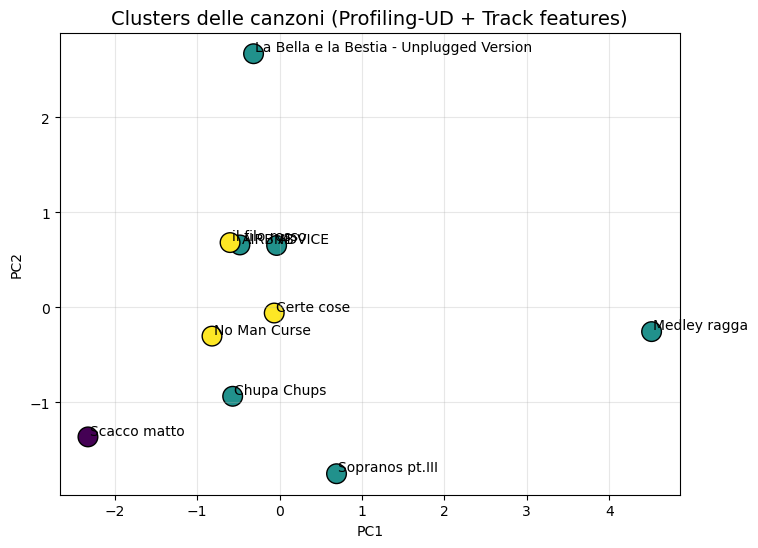

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=clusters, cmap='viridis', s=200, edgecolors='black')

for i, idx in enumerate(features_clean.index):
    title = df_merged.loc[idx, "title"]
    plt.text(components[i,0] + 0.02, components[i,1] + 0.02, title, fontsize=10)

plt.title("Clusters delle canzoni (Profiling-UD + Track features)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.show()


In [56]:
cluster_profile = df_merged.groupby("cluster")[[
    "n_sentences",
    "n_tokens",
    "char_per_tok",
    "avg_token_per_clause",
    "swear_IT",
    "lexical_density",
    "avg_max_depth"
]].mean()

cluster_profile


,n_sentences,n_tokens,char_per_tok,avg_token_per_clause,swear_IT,lexical_density,avg_max_depth
cluster,,,,,,,
0.0,12.000000,144.000000,4.222222,28.800000,0.000000,0.529915,2.333333
1.0,107.666667,769.000000,3.999444,8.760573,5.833333,0.514645,2.187379
2.0,71.666667,480.666667,4.094948,5.898895,0.000000,0.518893,2.430925


In [57]:
features_all = tracks_df[[
    "n_sentences",
    "n_tokens",
    "char_per_tok",
    "avg_token_per_clause",
    "swear_IT",
    "explicit",
    "bpm",
    "rms",
    "pitch",
    "spectral_complexity",
    "loudness",
    "popularity",
    "streams@1month"
]]

# togliamo righe con missing (ce ne sono poche)
features_all_clean = features_all.dropna()


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler_all = StandardScaler()
X_all = scaler_all.fit_transform(features_all_clean)

kmeans_all = KMeans(n_clusters=4, random_state=42)
clusters_all = kmeans_all.fit_predict(X_all)

tracks_df.loc[features_all_clean.index, "cluster_all"] = clusters_all


In [59]:
profile_all = tracks_df.groupby("cluster_all")[[
    "n_sentences",
    "n_tokens",
    "char_per_tok",
    "avg_token_per_clause",
    "swear_IT",
    "explicit",
    "bpm",
    "rms",
    "pitch",
    "spectral_complexity",
    "loudness",
    "popularity",
    "streams@1month"
]].mean()

profile_all


,n_sentences,n_tokens,char_per_tok,avg_token_per_clause,swear_IT,explicit,bpm,rms,pitch,spectral_complexity,loudness,popularity,streams@1month
cluster_all,,,,,,,,,,,,,
0.0,42.195188,349.989135,4.198233,7.877923,1.225844,0.447808,114.397210,0.149458,2193.221743,19.272705,14.440932,28.894063,9407.713232
1.0,58.130748,469.451157,4.013355,7.876141,1.434025,0.001503,114.582843,0.253208,2188.163732,32.047590,27.949149,31.054103,14345.876766
2.0,90.747765,764.780332,4.016339,7.511789,6.598340,0.606641,108.858391,0.196789,2360.913865,25.223430,20.455669,29.583014,19598.682631
3.0,59.393974,512.303858,4.004708,8.451661,2.185863,0.983385,116.006325,0.263680,2311.542460,30.053891,29.641778,38.273444,28123.683469


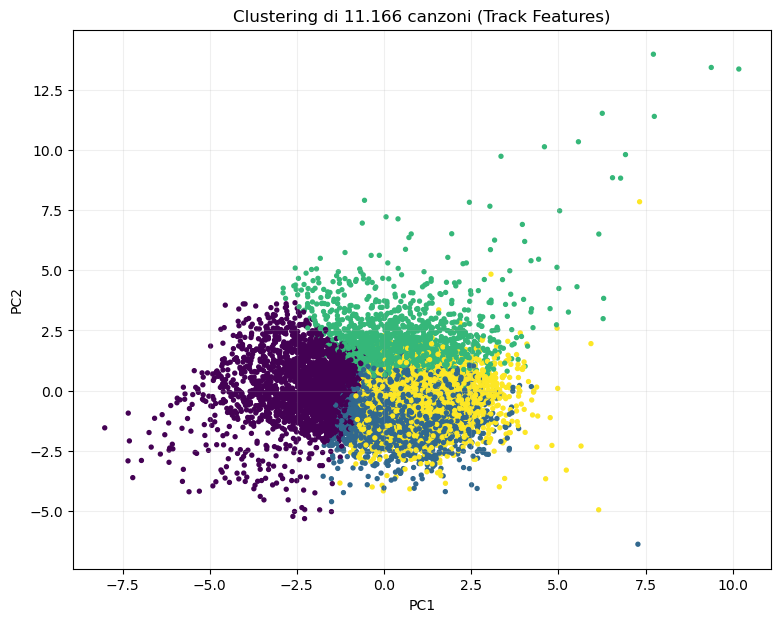

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_all = PCA(n_components=2)
components_all = pca_all.fit_transform(X_all)

plt.figure(figsize=(9,7))
plt.scatter(
    components_all[:,0],
    components_all[:,1],
    c=clusters_all,
    cmap='viridis',
    s=8
)

plt.title("Clustering di 11.166 canzoni (Track Features)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.2)
plt.show()
